# Book
https://wikidocs.net/book/2788

```
torch --- tensor, like numpy
   |
   | ---- torch.autograd : Function, enable_grad/no_grad
   |
   | ---- torch.nn : Module, Loss functions
   |
   | ---- torch.optim : Optimization alogs centered on SGD
   |
   | ---- torch.utils.data : DataLoader, Dataset, minibatch utils
   |
   | ---- torch.onnx : ONNX(Open Neural Network Exchange) format
```

# Tensor
```
torch.tensor(arr, dtype)
torch.from_numpy(ndarray)
```
- Similar to Ndarray
- dType MUST be same

In [125]:
import torch
import numpy

x = torch.arange(10, dtype=torch.uint8).resize(2, 5) # shape [2, 5]
y = torch.eye(5, dtype=torch.uint8) # shape [5, 5]
z = torch.zeros(2, 5, dtype=torch.uint8) # shape

x @ y # x.matmul(y)
x * z # x.mul(y)

x = x.to(torch.float16)
x.mean(dim=-1)


# tensor.view == ndarray.reshape
x = x.view(5, 2)
x = x.view(-1, 5) # -1 is determined automatically
# tensor.shape == tensor.size()
assert x.shape == x.size()
assert x.shape[0] == x.size(0)

# Squeeze & Unsqueeze
t = torch.randn(1, 10, 1, 3, 1)
assert t.squeeze().shape == torch.Size([10, 3]) # Remove 1-dim

t = torch.randn(10)
assert t.unsqueeze(1).shape == torch.Size([10, 1]) # Add 1-dim
assert t.unsqueeze(0).shape == torch.Size([1, 10])

# Concat & Stacking
x = torch.ones(1, 2, 3)
y = torch.ones(1, 2, 3)
# Extend dim
# Other dimensions MUST be same
assert torch.cat([x,y]).shape == torch.Size([2, 2, 3]) 
assert torch.cat([x,y], dim=1).shape == torch.Size([1, 4, 3])

# Stack at dim
# All dim must be same
assert torch.stack([x, y], dim = 0).shape == torch.Size([2, 1, 2, 3])
assert torch.stack([x, y], dim = 1).shape == torch.Size([1, 2, 2, 3])
assert torch.stack([x, y], dim = 2).shape == torch.Size([1, 2, 2, 3])
assert torch.stack([x, y], dim = 3).shape == torch.Size([1, 2, 3, 2])

# in-place operator has _ postfix
x = torch.ones(1)
x.mul_(2)
assert x == torch.ones(1) * 2

## Linear Regression
- To train & eval, dataset and model MUST be in same device
- To pass data, data & parameters MUST be same dtype

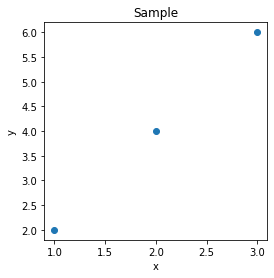

In [126]:
import torch
import matplotlib.pyplot as plt

x_train = torch.FloatTensor([1,2,3]).unsqueeze(1) # batchsize, x
y_train = torch.FloatTensor([2,4,6]).unsqueeze(1) # batchsize, y

x_valid = torch.FloatTensor([7,8,9]).unsqueeze(1)
y_valid = torch.FloatTensor([14,16,18]).unsqueeze(1)

x_test = torch.FloatTensor([4,5,6]).unsqueeze(1)
y_test = torch.FloatTensor([8,10,12]).unsqueeze(1)
plt.figure(figsize=(4,4))
plt.title("Sample")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train)

Epoch  100/1000 W: 1.752, b: 0.564 Cost: 0.045798
Epoch  200/1000 W: 1.805, b: 0.443 Cost: 0.028300
Epoch  300/1000 W: 1.847, b: 0.348 Cost: 0.017488
Epoch  400/1000 W: 1.880, b: 0.274 Cost: 0.010806
Epoch  500/1000 W: 1.905, b: 0.215 Cost: 0.006678
Epoch  600/1000 W: 1.926, b: 0.169 Cost: 0.004126
Epoch  700/1000 W: 1.941, b: 0.133 Cost: 0.002550
Epoch  800/1000 W: 1.954, b: 0.105 Cost: 0.001576
Epoch  900/1000 W: 1.964, b: 0.082 Cost: 0.000974
Epoch 1000/1000 W: 1.972, b: 0.065 Cost: 0.000602


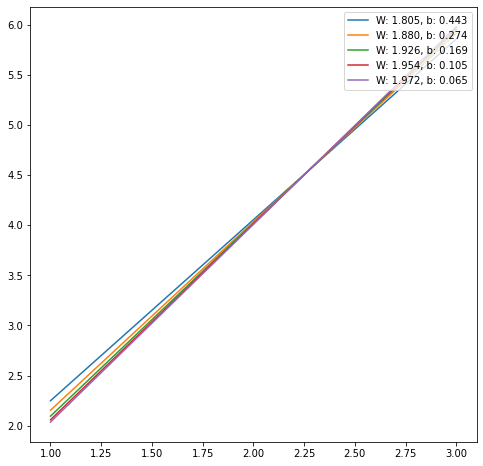

In [155]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

torch.manual_seed(1) # Fix seed
    
# Initialize parameters
W = torch.randn(1, 1, requires_grad=True) # Track gradients
b = torch.randn(1, 1, requires_grad=True) # Track gradients

plt.figure(figsize=(8,8))

nb_epochs = 1000
for epoch in range(1, nb_epochs+1):
    # Hypothesis
    H = x_train @ W + b

    # Cost function
    cost = torch.mean((H - y_train) ** 2, dim = 0)    

    # Optimizer
    optimizer = optim.SGD([W, b], lr=1e-2)

    # Learning
    ## Reset gradient
    optimizer.zero_grad()
    ## Calcuate gradient
    cost.backward()
    ## Update parameters
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}"\
              .format(epoch, nb_epochs, W.item(), b.item(), cost.item()))
    if epoch % 200 == 0:
        plt.plot(x_train, H.detach().numpy(), label = "W: {:.3f}, b: {:.3f}".format(W.item(), b.item()))

plt.legend(loc='upper right')

### Optimizer.zero_grad()
- Pytorch accumulates gradients

In [164]:
import torch
w = torch.tensor(2.0, requires_grad=True)
nb_epochs = 2
for epoch in range(nb_epochs + 1):
    z = 2*w
    z.backward()
    print("dz/dw: {}".format(w.grad))

print('='*20)
optimizer = torch.optim.SGD([w], lr=1e-2)
for epoch in range(nb_epochs + 1):
    z = 2*w
    optimizer.zero_grad()
    z.backward()
    print("dz/dw: {}".format(w.grad))


dz/dw: 2.0
dz/dw: 4.0
dz/dw: 6.0
dz/dw: 2.0
dz/dw: 2.0
dz/dw: 2.0


## Autograd
```requires_grad=True``` applies **autograd** option

In [167]:
import torch
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 2*y + 5
z.backward()
print("dz/dw: {}".format(w.grad))

dz/dw: 8.0


## Multivariable Linear Regression

In [244]:
import pandas as pd
import numpy as np
import torch

df = pd.DataFrame(np.array([
    [73, 93, 89, 96, 73],
    [80, 88, 91, 98, 66],
    [75, 93, 80, 100, 70],
]).T, columns=['Quize 1(x1)', 'Quize 2(x2)', 'Quize 3(x3)'])
final = np.sum(df.to_numpy(), axis=1)
df['Final(y)'] = final

# Data
x_train = torch.from_numpy(df.iloc[:, :3].to_numpy()).to(torch.float32) # shape = [5, 3]
y_train = torch.from_numpy(df.iloc[:, 3].to_numpy()).to(torch.float32).view(-1,1) # shape = [5, 1]

# Hypothesis
torch.manual_seed(1)
W = torch.zeros(3, 1, requires_grad=True, dtype=torch.float32)
b = torch.zeros(1, requires_grad=True, dtype=torch.float32)

# Optimizer
optimizer = torch.optim.SGD([W, b], lr=1e-5, momentum=.7)

nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
    H = x_train @ W + b
    cost = torch.mean((H - y_train) ** 2)
    #Learn
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} W: {}, b: {:.3f} Cost: {:.6f}"\
              .format(epoch, nb_epochs, W.detach().squeeze(), b.item(), cost.item()))

Epoch  100/1000 W: tensor([1.0042, 1.0027, 0.9928]), b: 0.012 Cost: 0.001094
Epoch  200/1000 W: tensor([1.0040, 1.0023, 0.9935]), b: 0.012 Cost: 0.000891
Epoch  300/1000 W: tensor([1.0038, 1.0019, 0.9941]), b: 0.012 Cost: 0.000729
Epoch  400/1000 W: tensor([1.0036, 1.0016, 0.9946]), b: 0.012 Cost: 0.000599
Epoch  500/1000 W: tensor([1.0034, 1.0013, 0.9951]), b: 0.012 Cost: 0.000494
Epoch  600/1000 W: tensor([1.0032, 1.0011, 0.9955]), b: 0.012 Cost: 0.000409
Epoch  700/1000 W: tensor([1.0030, 1.0009, 0.9959]), b: 0.012 Cost: 0.000340
Epoch  800/1000 W: tensor([1.0029, 1.0007, 0.9963]), b: 0.012 Cost: 0.000284
Epoch  900/1000 W: tensor([1.0027, 1.0005, 0.9966]), b: 0.012 Cost: 0.000239
Epoch 1000/1000 W: tensor([1.0026, 1.0004, 0.9969]), b: 0.012 Cost: 0.000201


### Linear Regression with nn.Module

In [259]:
import torch
import torch.nn as nn
import torch.nn.functional as F # loss function

# data
x_train = torch.FloatTensor([[1],[2],[3]]) # shape = [3, 1]
y_train = torch.FloatTensor([[2], [4], [6]]) # shape = [3, 1]

model = nn.Linear(1, 1, dtype=torch.float32)

#parameters
print(list(model.parameters())) # First: W, Last: b

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
    y_pred = model(x_train)
    cost = F.mse_loss(y_pred, y_train)
    
    # Learn
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}"\
              .format(epoch, nb_epochs, cost.item()))
        
# Predict
new_var = torch.FloatTensor([4.])

with torch.autograd.no_grad():
    pred_y = model(new_var) #Forward
    print("2x4={:.2f}".format(pred_y.item()))
    


[Parameter containing:
tensor([[0.5961]], requires_grad=True), Parameter containing:
tensor([0.5435], requires_grad=True)]
Epoch    0/2000 Cost: 6.440542
Epoch  500/2000 Cost: 0.012233
Epoch 1000/2000 Cost: 0.001102
Epoch 1500/2000 Cost: 0.000099
Epoch 2000/2000 Cost: 0.000009
2x4=7.99


## Implement model with class

In [268]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

class MultivariableLinearRegressionModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.linear = nn.Linear(in_dim, out_dim)
    def forward(self, x):
        return self.linear(x)

## Mini Batch and Data Load
- batch_size := the size of mini batch
  - Batch Size is a power of 2 'cause the memories of CPU and GPU are multiples of 2
- Mini Batch is like **stochastic search**
- Dataset := Define dataset
- DataLoader := Iter(Dataset)
- DataPipe := Pipelining dataset

In [279]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

x_train = torch.tensor([
    [73, 80, 75],
    [93, 88, 93],
    [89, 91, 90],
    [96, 98, 100],
    [73, 66, 70],
], dtype=torch.float32) # shape [dataset, features]
y_train = torch.tensor([
    [152],
    [185],
    [180],
    [196],
    [142],
], dtype=torch.float32) # shape [ dataset, output]

dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 5
for epoch in range(1, nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        y_pred = model(x_train)
        # Learn
        optimizer.zero_grad()
        cost = F.mse_loss(y_pred, y_train)
        cost.backward()
        optimizer.step()
        
        print('Epoch: {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()
        ))
        

Epoch:    1/5 Batch 1/3 Cost: 52053.398438
Epoch:    1/5 Batch 2/3 Cost: 8749.958008
Epoch:    1/5 Batch 3/3 Cost: 2212.415039
Epoch:    2/5 Batch 1/3 Cost: 1748.180542
Epoch:    2/5 Batch 2/3 Cost: 362.186890
Epoch:    2/5 Batch 3/3 Cost: 103.965866
Epoch:    3/5 Batch 1/3 Cost: 44.238678
Epoch:    3/5 Batch 2/3 Cost: 19.316801
Epoch:    3/5 Batch 3/3 Cost: 7.101295
Epoch:    4/5 Batch 1/3 Cost: 4.449821
Epoch:    4/5 Batch 2/3 Cost: 1.305181
Epoch:    4/5 Batch 3/3 Cost: 0.040987
Epoch:    5/5 Batch 1/3 Cost: 1.701204
Epoch:    5/5 Batch 2/3 Cost: 2.216830
Epoch:    5/5 Batch 3/3 Cost: 0.132739


## Custom Dataset

In [282]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset): # Like Sequence
    def __init__(self):
        # Preprocessing
        self.x_data = torch.tensor([
            [73, 80, 75],
            [93, 88, 93],
            [89, 91, 90],
            [96, 98, 100],
            [73, 66, 70],
        ], dtype=torch.float32)
        
        self.y_data = torch.tensor([
            [152],
            [185],
            [180],
            [196],
            [142],
        ], dtype=torch.float32)
    
    def __len__(self):
        # Total size of dataset
        return len(self.x_data)
    
    def __getitem__(self):
        # Get a sample
        x = tensor.tensor(self.x_data[i])
        y = tensor.tensor(self.y_data[i])
        return x, y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

## Logistic Regression
```
sigmoid(x) = 1/{1 + exp(x*w + b)}
```
- W := scaling sigmoid
- b := moving sigmoid
- With sigmoid, **CROSS-ENTROPY** is loss function

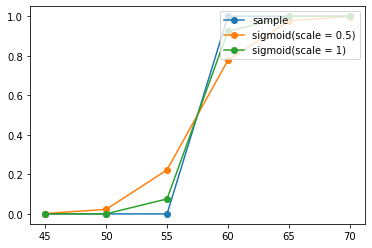

In [326]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(range(45, 75, 5), columns=['score(x)'])
df['result(y)'] = list(map(lambda score: '합격' if score >= 60 else '불합격', df.iloc[:,0].to_numpy()))

x = df.iloc[:,0].to_numpy()
y = list(map(lambda result: 1 if result == '합격' else 0, df.iloc[:,1].to_numpy()))
plt.plot(x, y, marker='o', label='sample')

# Sigmoid
sigmoid = lambda x: 1/(1+np.exp(-x))
y_pred = sigmoid(.5*(x - np.mean(x)))
plt.plot(x, y_pred, marker='o', label='sigmoid(scale = 0.5)')
y_pred = sigmoid(1*(x - np.mean(x)))
plt.plot(x, y_pred, marker='o', label='sigmoid(scale = 1)')
plt.legend(loc='upper right')
plt.show()

In [336]:
# Implement logistic regression
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(1)
x_data = torch.FloatTensor([
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 3],
    [5, 3],
    [6, 2],
])
y_data = torch.FloatTensor([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
])

W = torch.randn(2, 1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)
optimizer = optim.SGD([W, b], lr=1e-2)
nb_epochs = 5000
for epoch in range(1, nb_epochs+1):
    H = 1/(1 + torch.exp(-(x_data @ W + b)))
    
    # Learn
    optimizer.zero_grad()
    cost = F.binary_cross_entropy(H, y_data)
    cost.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print("Epoch {:4d}/{} W: {}, b: {:.3f} Cost: {:.6f}"\
              .format(epoch, nb_epochs, W.detach().squeeze(), b.item(), cost.item()))  

# Predict
with torch.autograd.no_grad():
    y_pred = torch.sigmoid(x_data @ W + b)
    prediction = y_pred >= torch.FloatTensor([.5])
    print(prediction.squeeze())

Epoch  500/5000 W: tensor([ 0.6194, -0.4417]), b: -0.632 Cost: 0.458254
Epoch 1000/5000 W: tensor([ 0.7924, -0.5166]), b: -1.085 Cost: 0.409310
Epoch 1500/5000 W: tensor([ 0.8860, -0.4934]), b: -1.488 Cost: 0.374899
Epoch 2000/5000 W: tensor([ 0.9478, -0.4357]), b: -1.858 Cost: 0.346031
Epoch 2500/5000 W: tensor([ 0.9955, -0.3668]), b: -2.203 Cost: 0.320834
Epoch 3000/5000 W: tensor([ 1.0367, -0.2965]), b: -2.526 Cost: 0.298610
Epoch 3500/5000 W: tensor([ 1.0747, -0.2287]), b: -2.830 Cost: 0.278923
Epoch 4000/5000 W: tensor([ 1.1110, -0.1650]), b: -3.116 Cost: 0.261424
Epoch 4500/5000 W: tensor([ 1.1462, -0.1058]), b: -3.387 Cost: 0.245816
Epoch 5000/5000 W: tensor([ 1.1806, -0.0510]), b: -3.643 Cost: 0.231843
tensor([False, False, False,  True,  True,  True])


## Logistic with nn.Module

In [348]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)
x_data = torch.FloatTensor([
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 3],
    [5, 3],
    [6, 2],
])
y_data = torch.FloatTensor([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
])

model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid() # output
)

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=.7)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
    y_pred = model(x_data)
    
    # Learn
    optimizer.zero_grad()
    cost = F.binary_cross_entropy(y_pred, y_data)
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        prediction = y_pred > torch.FloatTensor([.5])
        correct_prediction = prediction.float() == y_data
        accuracy = torch.sum(correct_prediction).item() / len(correct_prediction)
        print('Epoch: {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy * 100))
        

Epoch:    0/10000 Cost: 0.539713 Accuracy: 83.33%
Epoch: 1000/10000 Cost: 0.285175 Accuracy: 83.33%
Epoch: 2000/10000 Cost: 0.194415 Accuracy: 100.00%
Epoch: 3000/10000 Cost: 0.146636 Accuracy: 100.00%
Epoch: 4000/10000 Cost: 0.117751 Accuracy: 100.00%
Epoch: 5000/10000 Cost: 0.098494 Accuracy: 100.00%
Epoch: 6000/10000 Cost: 0.084747 Accuracy: 100.00%
Epoch: 7000/10000 Cost: 0.074434 Accuracy: 100.00%
Epoch: 8000/10000 Cost: 0.066406 Accuracy: 100.00%
Epoch: 9000/10000 Cost: 0.059972 Accuracy: 100.00%
Epoch: 10000/10000 Cost: 0.054698 Accuracy: 100.00%


## Logistic with Class

In [349]:
import torch.nn as nn
import torch

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        return self.sigmoid(self.linear(x))

## Softmax Regression
- Multi-Class Classification
- Use **ONE-HOT-VECTOR** for **LABEL**
- Use **CROSS-ENTROPY** for **COST**

In [13]:
import torch
import torch.nn.functional as F

torch.manual_seed(1)

z = torch.randn(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis.sum(dim=1))

y = torch.randint(5, (3,)).long() # label
y_one_hot = torch.zeros_like(hypothesis).scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot)

#Cost 1
cost = -(y_one_hot * torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

#Cost 2
cost = -(y_one_hot * F.log_softmax(z, dim=1)).sum(dim = 1).mean()
print(cost)

#Cost 3
cost = F.nll_loss(F.log_softmax(z, dim=1), y) # Include all except softmax
print(cost)

#Cost 4
cost = F.cross_entropy(z, y) # Include softmax
print(cost)

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)
tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])
tensor(1.9087, grad_fn=<NegBackward0>)
tensor(1.9087, grad_fn=<NegBackward0>)
tensor(1.9087, grad_fn=<NllLossBackward0>)
tensor(1.9087, grad_fn=<NllLossBackward0>)


In [28]:
# Softmax Regression
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([
    [1,2,1,1],
    [2,1,3,2],
    [3,1,3,4],
    [4,1,5,5],
    [1,7,5,5],
    [1,2,5,6],
    [1,6,6,6],
    [1,7,7,7],
])

y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

print(x_train.size())
print(y_train.size())

y_one_hot = torch.zeros(8, 3).scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.size())

# Model
W = torch.randn((4,3), requires_grad=True)
b = torch.randn(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=0.1)

# With model
model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)


nb_epochs = 200
for epoch in range(nb_epochs + 1):
    hypothesis = x_train @ W + b
    #OR
    hypothesis = model(x_train)
    
    cost = -(y_one_hot * torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()
    # OR
    cost = F.cross_entropy(hypothesis, y_train)
    
    # Learn
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch: {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
        ))

torch.Size([8, 4])
torch.Size([8])
torch.Size([8, 3])
Epoch:    0/200 Cost: 3.609993
Epoch:  100/200 Cost: 0.704503
Epoch:  200/200 Cost: 0.628528


In [29]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
    
    def forward(self, x):
        return self.linear(x)

## MNIST with softmax

In [45]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision.datasets import FashionMNIST
from torchvision.transforms import Lambda, ToTensor

import random

mnist_train = FashionMNIST(root='data', train=True, transform = ToTensor(), download = True)
mnist_test = FashionMNIST(root='data', train=False, transform = ToTensor(), download = True)

batch_size = 128
train_dataloader = DataLoader(mnist_train, batch_size, shuffle=True, drop_last=True)

# Model
model = nn.Linear(28*28, 10, bias = True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

training_epochs = 15
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(train_dataloader)
    
    for X,y in train_dataloader:
        X = X.view(-1, 28*28)
        
        optimizer.zero_grad()
        prediction = model(X)
        cost = criterion(prediction, y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch:', '%04d' %(epoch + 1), 'cost=','{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost= 0.689333141
Epoch: 0002 cost= 0.520577371
Epoch: 0003 cost= 0.487514168
Epoch: 0004 cost= 0.468393207
Epoch: 0005 cost= 0.456744939
Epoch: 0006 cost= 0.446521401
Epoch: 0007 cost= 0.441454679
Epoch: 0008 cost= 0.434858590
Epoch: 0009 cost= 0.430038124
Epoch: 0010 cost= 0.427635431
Epoch: 0011 cost= 0.422962338
Epoch: 0012 cost= 0.421395600
Epoch: 0013 cost= 0.419205219
Epoch: 0014 cost= 0.415567756
Epoch: 0015 cost= 0.414342850
Learning finished


Accuracy: 0.7829999923706055
Label: 4
Prediction: tensor(4)


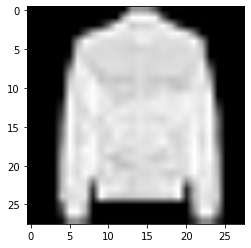

In [57]:
# Test
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = torch.mean(correct_prediction.float())
    print('Accuracy:', accuracy.item())

# Prediction
r = random.randint(0, len(mnist_test) + 1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float()
y_single_data = mnist_test.test_labels[r:r+1]

print('Label:', y_single_data.item())
single_prediction = model(X_single_data).argmax()
print('Prediction:', single_prediction)

plt.imshow(X_single_data.view(28, 28), cmap='gray', interpolation='bilinear')

## ML Concepts

| Hyper-parameters | Parameters |
| - | - |
| User-defined | Auto-learned |
| Tuned by validation | Tuned by train |
| Dropout, learning-rate, the number of hidden-layers | W, b |

- After tuning hyper-parameters, evaluate model with **test dataset**
- If the size of data is small, Use **K-fold cross-validation** or **Leave one-out**

### Confusion Matrix
https://sumniya.tistory.com/26
| Real \ Predict | True | False |
| - | - | - |
| True | TP | FN |
| False | FP | TN |

- Accuracy := (TP + TN) / (TP + FP + FN + TN)
- Precision := TP / (TP + FP) <-- Higher is better
- Recall := TP / (TP + FN) <-- Higher is better
- F1-score := harmonic-mean(Precision, Recall) <-- Higher is better
- **Precision & Recall are same as Type-1 & Type-2 errors**
- Fall-out(FPR) := FP / (FP + TN)
- ROC(Receiver-Operating-Characteristic) Curve
  - x-axis := Fall-out
  - y-axis := Recall
  - Valid when ROC curve is above y=x
  - Upper-Left graph is better
- AUC(Area Under Curve) := The area of ROC curve <-- 1 is better 0 is worse

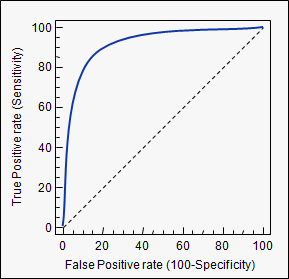

In [58]:
from IPython.display import Image
Image(r"./table01.png")

## Perceptron
```Find Hyper-Plane!```
### Single layer
- Implement AND & NAND & OR gate

### Multi layer
- Implement XOR gate

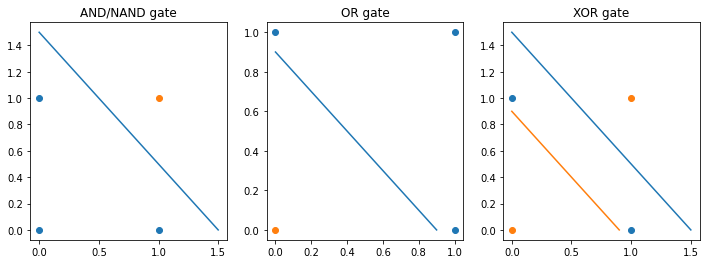

In [79]:
# Binary input
def and_gate(x1, x2):
    '''Return 1 when only x1 == x2 == 1'''
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    ret = x1 * w1 + x2 * w2 + b
    return 1 if ret >= 0 else 0

def or_gate(x1, x2):
    '''Return 0 when only x1 == x2 == 0'''
    w1 = 0.5
    w2 = 0.5
    b = -0.4
    ret = x1 * w1 + x2 * w2 + b
    return 1 if ret >= 0 else 0

def nand_gate(x1, x2):
    '''Return 0 when only x1 == x2 == 1'''
    return 0 if and_gate(x1, x2) else 1

def xor_gate(x1, x2):
    '''Return 1 when only x1 != x2'''
    x1 = and_gate(x1, x2) # 1 when and(1, 1)
    x2 = or_gate(x1, x2) # 0 when or(0, 0)
    w1 = -0.5
    w2 = +0.5
    b = -0.3
    ret = x1 * w1 + x2 * w2 + b
    return 1 if ret >=0 else 0
    

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title("AND/NAND gate")
plt.scatter([0,0,1], [0,1,0])
plt.scatter([1], [1])
plt.plot([0, 1.5], [1.5, 0])

plt.subplot(132)
plt.title("OR gate")
plt.scatter([0,1,1], [1,0,1])
plt.scatter([0], [0])
plt.plot([0, 0.9], [0.9, 0])

plt.subplot(133)
plt.title("XOR gate")
plt.scatter([0,1], [1,0])
plt.scatter([0,1], [0,1])
plt.plot([0, 1.5], [1.5, 0])
plt.plot([0, 0.9], [0.9, 0])

## Linear & Non-Linear layer
- If layer uses linear activation, it is called by linear-layer(projection-layer)
  - Ex. flatten, pooling 
- If layer uses non-linear activation, it is called by non-linear-layer
  - All except linear-layers

### Hidden-layer's activation
- Relu is recommended!!
- tanh is next & sigmoid is last

### Output-layer's activation and loss functions
| Problem | Activation | Criterion |
| - | - | - |
| Binary Classifier | Sigmoid | nn.BCELoss() |
| Multi-Class Classifier | Softmax | nn.CrossEntropyLoss() |
| Regression | No | MSE |

## Hand-written letters with DL

In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

mnist_train = MNIST(root='data', download=True, transform = ToTensor(), train=True)
mnist_test = MNIST(root='data', download=True, transform = ToTensor(), train=False)

train_dataloader = DataLoader(mnist_train, 128, shuffle=True, drop_last=True)

# Model
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(28*28, 32)
        self.hidden = nn.Linear(32, 16)
        self.output = nn.Linear(16, 10)
    def forward(self, x):
        x = nn.Flatten()(x)
        x = F.relu(self.input(x))
        x = F.relu(self.hidden(x))
        out = self.output(x)
        return out
        
model = MNISTClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

losses = []
nb_epochs = 100
batch_size = len(train_dataloader)
for epoch in range(nb_epochs + 1):
    loss = 0.0
    for X, y in train_dataloader:
        y_pred = model(X)
        
        optimizer.zero_grad()
        cost = criterion(y_pred, y)
        cost.backward()
        optimizer.step()
        
        loss += cost / batch_size
        
    if epoch % 10 == 0:
        print('Epoch: {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, loss.item()))
print("Done")

Epoch:    0/100 Cost: 0.669111
Epoch:   10/100 Cost: 0.105194
Epoch:   20/100 Cost: 0.064681
Epoch:   30/100 Cost: 0.042579
Epoch:   40/100 Cost: 0.029049
Epoch:   50/100 Cost: 0.019546
Epoch:   60/100 Cost: 0.014915
Epoch:   70/100 Cost: 0.010154
Epoch:   80/100 Cost: 0.008750
Epoch:   90/100 Cost: 0.006094
Epoch:  100/100 Cost: 0.007910
Done


## Prevent overfitting
- More DATA
- Reduce the complexity
  - The number of hidden layers
  - The number of parameters
  - **CAPACITY** := the number of parameters in model
- Apply regularization 
  - L1 : Find the features to affect the result
  - L2 : Use it except finding the features that exactly affect model
    - Weight decay
    - ```optimizer(..., weight_decay=rate)```
- Apply Dropout
  - Use only training time

## Prevent Gradient Vanishing and Exploding
- Use ReLU & ReLU variant(Leaky ReLU) in hidden layers

### Weight initialization(nn.init)
- Xavier Initialization
  - Initialize weights on uniform/normal distribution
  - Good with S-curve activation like sigmoid or tanh
- He Initialization
  - Initialize weights on uniform/normal distribution
  - Good with ReLU

### Batch Normalization
- Internal Covariate Shift
  - The phenomenon that the input-distribution is changed in each layer
  - Current input distribution is different with a previous distribution 'cause changed weights
  | Covariate Shift | Internal Covariate Shift |
  | - | - |
  | Train and Test distribution are different | Each input data distribution is differnet in model |

- Batch Normalization(nn.BatchNorm2d)
  - Normalize input data before passed in activation
  - Shift mean/variance is saved and Use them when testing/prediction
  - Good
    - Very improve vanishing gradients even if using sigoid or tanh
    - Less sensitive weight initializations
    - More learning-rate can be adopted
    - Prevent overfitting 'cause mean and std is similar to noise
  - Bad
    - Complex model. So, predcition is slower
  - Limit
    - Dependency on mini-batch size, small size is bad
    - Hard to apply RNN
      - RNN have diffenent static variables in each timestep

- Layer Normalization(nn.LayerNorm)
  - Not dependency on mini-batch size
  - Can apply RNN

```
   feature1.  feature2.  feature3. ... featuren
       x11.      x12.       x13.          x1n   <--- mean(layer), std(layer)   Layer
       x21.      x22.       x23.          x2n   <--- mean(layer), std(layer)   Normalization
       
 mean(feature1)  ...           <--- Batch  
  std(feature1)  ...           <--- Normalization

```

## CNN

### Convolution Layer
- Convolution Operator & Activation
- Convolution Operator
  - Extract features
  - Kernel := 3x3 or 5x5
  - Scan image by kernel
- Padding
  - The result of convolution operator is smaller than original
  - To maintain the size, add padding
- Parameters
  - W := the elements of kernel, 3x3 = 9, 5x5 = 25
  - b := only one bias is added each kernel
- Convolution Operator with multi-channel/depth
  - The number of kernels(**kernel block**) are same as the number of channels
  - The result of operation is added by each output
- Multi-channel features
  - The number of kernel block is the number of channel of feature maps

| conv1d | conv2d | conv3d |
| - | - | - |
| Scan 1D(Left/Right) | Scan 2D(Height/Width) | Scan 3D(Height/Width/Channel) |
| Text/Audio | Image | Video |

### Pooling Layer
- Downsampling Operator
- No parameters, No change the number of channels

In [94]:
### MNIST with CNN
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

class MNISTClassifierWithCNN(nn.Module):
    def __init__(self):
        super().__init__()
        #First layer
        # ImgIn shape=(?, 28, 28, 1)
        # Conv -> (?, 28, 28, 32)
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
        )
        #Second Layer
        # ImgIn shape = (?, 28, 28, 32)
        # Pool -> (?, 14, 14, 32)
        self.layer2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # Third Layer
        # ImgIn shape = (?, 14, 14, 32)
        # Conv -> (?, 14, 14, 64)
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
        )
        # Fourth Layer
        # ImgIn shape = (?, 14, 14, 64)
        # Pool -> (?, 7, 7, 64)
        self.layer4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # FC Layer
        # FC -> (?, 7*7*64) -> (?, 10)
        self.fc = nn.Linear(7*7*64, 10, bias=True)
        
        #Weight initialization at FC layer
        nn.init.kaiming_normal_(self.fc.weight) # He-initialization
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = MNISTClassifierWithCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

mnist_train = MNIST(root='data', download=True, transform = ToTensor(), train=True)
mnist_test = MNIST(root='data', download=True, transform = ToTensor(), train=False)

train_dataloader = DataLoader(mnist_train, 128, shuffle=True, drop_last=True)

nb_epochs = 5
for epoch in range(nb_epochs):
    avg_cost = 0
    for X, y in train_dataloader:
        y_pred = model(X)
        
        optimizer.zero_grad()
        cost = criterion(y_pred, y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / len(train_dataloader)
    print('[Epoch:{:>4}] cost:{:>.9}'.format(epoch+1, avg_cost))

[Epoch:   1] cost:0.1645661
[Epoch:   2] cost:0.0539549068
[Epoch:   3] cost:0.0423941948
[Epoch:   4] cost:0.0347453766
[Epoch:   5] cost:0.0329390466


In [96]:
# Test
with torch.no_grad():
    X_test = mnist_test.test_data.float().view(-1, 1, 28, 28)
    y_test = mnist_test.test_labels
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, dim=1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8823000192642212


## Natural Language
```
torchtext ---
           |
           | -- File Loading
           | -- Tokenization
           | -- Vocab
           | -- Integer encoding
           | -- Word Vector
           | -- Batching(including padding)
```

### Embedding Visualization
- Google embedding projector(https://projector.tensorflow.org/)

### nn.Embedding()
- Look-Up table
```
Word --> Integer --> Lookup Table --> Embedding vector
                       .5, .2, .3
great      1           .2, .7, .1 ---> [.2, .7, .1] for great(integer=1)
love       5
happy      7
```
- Use Glove, pre-trained embedding vector

In [122]:
import torch

torch.manual_seed(1)


train_data = 'you need to know how to code'
word_set = set(train_data.split())
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

embedding_table = torch.randn(len(vocab), 3)
embedding_table = torch.nn.functional.softmax(embedding_table, dim = 1) # Normalize

sample = 'you need to run'.split()
idxes = []

#Lookup
for word in sample:
    try:
        idxes.append(vocab[word])
    except KeyError:
        idxes.append(vocab['<unk>'])

idxes = torch.LongTensor(idxes)
lookup_result = embedding_table[idxes, :]
print(lookup_result)

{'need': 2, 'to': 3, 'code': 4, 'know': 5, 'you': 6, 'how': 7, '<unk>': 0, '<pad>': 1}
tensor([[0.1683, 0.7109, 0.1208],
        [0.1765, 0.0941, 0.7294],
        [0.3229, 0.5861, 0.0910],
        [0.1798, 0.3904, 0.4298]])


In [123]:
# With nn.Embedding()
import torch.nn as nn

train_data = 'you need to know how to code'
word_set = set(train_data.split())
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

# padding_idx := idx of padding token
embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=3, padding_idx=1)

{'need': 2, 'to': 3, 'code': 4, 'know': 5, 'you': 6, 'how': 7, '<unk>': 0, '<pad>': 1}
Parameter containing:
tensor([[-1.8821, -0.7765,  2.0242],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.7312,  1.1718, -0.0255],
        [-1.0233, -0.5962, -1.0055],
        [-0.2106, -0.0075,  1.6734],
        [ 0.0103, -0.7040, -0.1853],
        [-0.9962, -0.8313, -0.4610],
        [-0.5601,  0.3956, -0.9823]], requires_grad=True)


## RNN
- Activation := tanh usually

In [124]:
# RNN hidden-state with Numpy
import numpy as np

In [142]:
# Input shape := (timesteps/seq_len, input_size/token_size)
timesteps = 10
input_size = 4
hidden_size = 8

inputs = np.random.random((timesteps, input_size))

hidden_state_t = np.zeros((hidden_size,))

W_in = np.random.random((input_size, hidden_size))
W_h = np.random.random((hidden_size, hidden_size))
b = np.random.random((hidden_size,))

total_hidden_states = []
for input_t in inputs:
    output_t = np.tanh(np.matmul(input_t, W_in) + np.matmul(hidden_state_t, W_h) + b)
    total_hidden_states.append(list(output_t))
total_hidden_states = np.stack(total_hidden_states, axis=0)
print(total_hidden_states)

[[0.94398097 0.9833237  0.92376118 0.92508168 0.41222792 0.95429872
  0.99052137 0.62737444]
 [0.88194808 0.94076572 0.84880819 0.87422381 0.36371503 0.91058464
  0.97298099 0.4348736 ]
 [0.74434947 0.91592275 0.68432457 0.82027871 0.2180257  0.82455073
  0.94035741 0.38529918]
 [0.89873895 0.97738256 0.80254542 0.86564961 0.31045678 0.90701799
  0.9819877  0.57942165]
 [0.93912005 0.9758133  0.91672192 0.94192966 0.41663827 0.9189033
  0.98640005 0.51681551]
 [0.97306128 0.99253723 0.97149265 0.95837331 0.49210104 0.98087387
  0.99626141 0.73046812]
 [0.9089008  0.96022419 0.82866178 0.88488339 0.37527073 0.88794891
  0.97823755 0.44953969]
 [0.94102747 0.98194795 0.94885348 0.94729445 0.41278979 0.96011464
  0.99018315 0.62744184]
 [0.93702419 0.97938573 0.89868926 0.92000095 0.40032689 0.93171024
  0.98772602 0.56991602]
 [0.68359504 0.903308   0.54861695 0.80443225 0.16948815 0.71408019
  0.91626455 0.31878309]]


In [147]:
# RNN with nn.RNN()
import torch
import torch.nn

input_size = 5
hidden_state = 8

inputs = torch.FloatTensor(1, 10, 5) # input shape = [batch_size, time_steps, input_size]

cell = nn.RNN(input_size, hidden_size, batch_first=True) # input shape = [batch_size, ...]

# Return all hidden_states at every timesteps and hidden_state at last timestep
outputs, _status = cell(inputs)
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


In [155]:
# Deep RNN with Numpy
import numpy as np

time_steps = 10
input_size = 5
hidden_size_layer1 = 7
hidden_size_layer2 = 9

inputs = np.random.random((time_steps, input_size))
hidden_state_t_layer1 = np.zeros((hidden_size_layer1,))
hidden_state_t_layer2 = np.zeros((hidden_size_layer2,))

# First hidden layer
W1_in = np.random.random((input_size, hidden_size_layer1))
W1_h = np.random.random((hidden_size_layer1, hidden_size_layer1))
b1 = np.random.random((hidden_size_layer1,))

layer1_outputs = []
for input_t in inputs:
    hidden_state_t_layer1 = np.tanh(np.matmul(input_t, W1_in) + np.matmul(hidden_state_t_layer1, W1_h) + b1)
    layer1_outputs.append(list(hidden_state_t_layer1))

layer1_outputs = np.stack(layer1_outputs, axis=0)
print(layer1_outputs.shape)

# Second hidden layer
W2_in = np.random.random((hidden_size_layer1, hidden_size_layer2))
W2_h = np.random.random((hidden_size_layer2, hidden_size_layer2))
b2 = np.random.random((hidden_size_layer2,))

layer2_outputs = []
for hidden1_t in layer1_outputs:
    hidden_state_t_layer2 = np.tanh(np.matmul(hidden1_t, W2_in) + np.matmul(hidden_state_t_layer2, W2_h) + b2)
    layer2_outputs.append(list(hidden_state_t_layer2))

layer2_outputs = np.stack(layer2_outputs, axis=0)

print(layer2_outputs.shape)

(10, 7)
(10, 9)


In [160]:
# Deep RNN with nn.RNN()
import torch.nn as nn
import torch

inputs = torch.FloatTensor(1, 10, 5) # batch_size, time_steps, input_size
cell = nn.RNN(input_size = 5, hidden_size = 8, batch_first=True, num_layers=2) # Stack layers

out, _status = cell(inputs) # Return all hidden-status at last layer and hidden-status at last timesteps at each layer
print(out.shape)
print(_status.shape) # num_layers, batch_size, hidden_size

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [181]:
# Bidirectional RNN with numpy
import numpy as np

## Shallow Network
time_steps = 10
input_size = 5
hidden_size = 8

inputs = np.random.random((time_steps, input_size))
forward_hidden_state = np.zeros((hidden_size,))
backward_hidden_state = np.zeros((hidden_size,))

W_in_forward = np.random.random((hidden_size, input_size))
W_h_forward = np.random.random((hidden_size, hidden_size))
b_forward = np.random.random((hidden_size,))

W_in_backward = np.random.random((hidden_size, input_size))
W_h_backward = np.random.random((hidden_size, hidden_size))
b_backward = np.random.random((hidden_size,))

# Calculate forward
all_hidden_states_forward1 = []
for input_t in inputs:
    forward_hidden_state = np.tanh(np.matmul(W_in_forward, input_t) + np.matmul(W_h_forward, forward_hidden_state) + b_forward)
    all_hidden_states_forward1.append(list(forward_hidden_state))
all_hidden_states_forward1 = np.stack(all_hidden_states_forward1, axis=0)

# Calculate backward
all_hidden_states_backward1 = []
for input_t in inputs[::-1]:
    backward_hidden_state = np.tanh(np.matmul(W_in_backward, input_t) + np.matmul(W_h_backward, backward_hidden_state) + b_backward)
    all_hidden_states_backward1.append(list(backward_hidden_state))
all_hidden_states_backward1 = np.stack(all_hidden_states_backward1, axis=0)


print("forward(1) shape:", all_hidden_states_forward1.shape)
print("backward(1) shape:", all_hidden_states_backward1.shape)

# Deep bidirectional RNN
## Use previous forward & backward hidden states

# Calculate forward
W_in_forward = np.random.random((hidden_size, hidden_size))
W_h_forward = np.random.random((hidden_size, hidden_size))
b_forward = np.random.random((hidden_size,))

all_hidden_states_forward2 = []
for input_t in all_hidden_states_forward1:
    forward_hidden_state = np.tanh(np.matmul(W_in_forward, input_t) + np.matmul(W_h_forward, forward_hidden_state) + b_forward)
    all_hidden_states_forward2.append(list(forward_hidden_state))
all_hidden_states_forward2 = np.stack(all_hidden_states_forward2, axis=0)

# Calculate backward
W_in_backward = np.random.random((hidden_size, hidden_size))
W_h_backward = np.random.random((hidden_size, hidden_size))
b_backward = np.random.random((hidden_size,))

all_hidden_states_backward2 = []
for input_t in all_hidden_states_backward1:
    # In real, parameters are diffent at layer1
    backward_hidden_state = np.tanh(np.matmul(W_in_backward, input_t) + np.matmul(W_h_backward, backward_hidden_state) + b_backward)
    all_hidden_states_backward2.append(list(backward_hidden_sate))
all_hidden_states_backward2 = np.stack(all_hidden_states_backward2, axis=0)

print("forward(2) shape:", all_hidden_states_forward2.shape)
print("backward(2) shape:", all_hidden_states_backward2.shape)

forward(1) shape: (10, 8)
backward(1) shape: (10, 8)
forward(2) shape: (10, 8)
backward(2) shape: (10, 8, 8)


In [173]:
# Bidirectional RNN with nn.RNN()
import torch
import torch.nn as nn

inputs = torch.FloatTensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers=2, batch_first=True, bidirectional=True)

outputs, _status = cell(inputs)
print(outputs.shape) # batch_size, time_steps, hidden_size * 2
print(_status.shape) # num_layers * 2, batch_size, hidden_size

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


In [180]:
# LSTM <- Change cell-memory evaluation

inputs = torch.FloatTensor(1, 10, 5)
cell = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first= True, bidirectional=True)
out, (hidden_status, cell_status) = cell(inputs)
print(out.shape)
print(hidden_status.shape) # Short-term status
print(cell_status.shape) # Long-term status

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])
torch.Size([4, 1, 8])


In [184]:
# LSTM with Numpy
import numpy as np

time_steps = 10
input_size = 5
hidden_size = 8

inputs = np.random.random((time_steps, input_size))

cell_state_t = np.zeros((hidden_size,))
hidden_state_t = np.zeros((hidden_size,))

#input gate
W_in_x_i = np.random.random((input_size, hidden_size))
W_in_h_i = np.random.random((hidden_size, hidden_size))
b_in_i = np.random.random((hidden_size,))

W_in_x_g = np.random.random((input_size, hidden_size))
W_in_h_g = np.random.random((hidden_size, hidden_size))
b_in_g = np.random.random((hidden_size,))


#delete gate
W_del_x = np.random.random((input_size, hidden_size))
W_del_h = np.random.random((hidden_size, hidden_size))
b_del = np.random.random((hidden_size,))

#Output gate
W_out_x = np.random.random((input_size, hidden_size))
W_out_h = np.random.random((hidden_size, hidden_size))
b_out = np.random.random((hidden_size,))

sigmoid = lambda x: 1/(1 + np.exp(-x))
all_hidden_states = []
all_cell_states = []
for input_t in inputs:
    # Input gate
    i_t = sigmoid(np.matmul(input_t, W_in_x_i) + np.matmul(hidden_state_t, W_in_h_i) + b_in_i)
    g_t = np.tanh(np.matmul(input_t, W_in_x_g) + np.matmul(hidden_state_t, W_in_h_g) + b_in_g)
    
    # Delete gate
    f_t = sigmoid(np.matmul(input_t, W_del_x) + np.matmul(hidden_state_t, W_del_h) + b_del)
    
    # Memory gate
    cell_state_t = f_t * cell_state_t + i_t * g_t
    
    # Output gate
    o_t = sigmoid(np.matmul(input_t, W_out_x) + np.matmul(hidden_state_t, W_out_h) + b_out)
    hidden_state_t = o_t * np.tanh(cell_state_t)
    
    all_cell_states.append(list(cell_state_t))
    all_hidden_states.append(list(hidden_state_t))
all_cell_states = np.stack(all_cell_states, axis=0)
all_hidden_states = np.stack(all_hidden_states, axis=0)

print(all_cell_states.shape)
print(all_hidden_states.shape)

(10, 8)
(10, 8)
